Importing the libraries that we'll use in our **Regression Predicting Model**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import math
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold

Creating dataframes from the .csv files containing datasets that we'll be working with.

In [ ]:
riders_df = pd.read_csv('https://raw.githubusercontent.com/Thapelo-M/regression/master/Riders.csv')
test_df = pd.read_csv('https://raw.githubusercontent.com/Thapelo-M/regression/master/Test.csv')
train_df = pd.read_csv('https://raw.githubusercontent.com/Thapelo-M/regression/master/Train.csv')
variable_df = pd.read_csv('https://raw.githubusercontent.com/Thapelo-M/regression/master/VariableDefinitions.csv')
sample_df = pd.read_csv('https://raw.githubusercontent.com/Thapelo-M/regression/master/SampleSubmission.csv')

In [ ]:
riders_df.shape

(960, 5)

In [ ]:
test_df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,4:44:29 PM,27,3,4:53:04 PM,27,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,12:59:17 PM,17,5,1:20:27 PM,17,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,11:25:05 AM,27,4,11:33:20 AM,27,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,1:53:27 PM,17,1,2:02:41 PM,17,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,11:34:45 AM,11,2,11:47:19 AM,11,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


In [ ]:

train_df = train_df.fillna(0)
train_df['Personal or Business'] = pd.factorize(train_df['Personal or Business'])[0]
train_df.head()


,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,0,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,0.0,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,1,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.4,0.0,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,0,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,0.0,0.0,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,0,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.2,0.0,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,1,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.4,0.0,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [ ]:
test_df = test_df.fillna(0)
test_df['Personal or Business'] = pd.factorize(test_df['Personal or Business'])[0]
test_df.shape

(7068, 25)

In [ ]:
sample_df.head()

,Order_No,Time from Pickup to Arrival
0,Order_No_19248,567.0
1,Order_No_12736,4903.0
2,Order_No_768,5649.0
3,Order_No_15332,NaN
4,Order_No_21373,NaN


Select **predictor variables** to be used in the model and drop others. Format(Feature Engineer) variables to numeric in order to enable use by **Machine Learning Algorithms**.

In [ ]:

#strip off strings from predictor variables and convert to conventional numerics

train_df['Arrival at Destination - Time'] = train_df['Arrival at Destination - Time'].map(lambda x: x.rstrip(' AMPM'))
train_df['Order No'] = train_df['Order No'].map(lambda x: x.lstrip('Order_No_'))
train_df['User Id'] = train_df['User Id'].map(lambda x: x.lstrip('User_Id_'))
train_df['Rider Id'] = train_df['Rider Id'].map(lambda x: x.lstrip('Rider_Id_'))

#Arrival at destination time
train_df['Arrival at Destination - Time'] = pd.to_datetime(train_df['Arrival at Destination - Time'], format='%H:%M:%S')
train_df['Hour_Destination'] = train_df['Arrival at Destination - Time'].dt.hour
train_df['Minute_Destination'] = train_df['Arrival at Destination - Time'].dt.minute
train_df['Second_Destination'] = train_df['Arrival at Destination - Time'].dt.second

#concatenate training and test sets
new_df = train_df.drop(['Time from Pickup to Arrival'], axis=1)

new_df['Pickup - Time'] = new_df['Pickup - Time'].map(lambda x: x.rstrip(' AMPM'))



#Pick up time
new_df['Pickup - Time'] = pd.to_datetime(new_df['Pickup - Time'], format='%H:%M:%S')
new_df['Hour_Pickup'] = new_df['Pickup - Time'].dt.hour
new_df['Minute_Pickup'] = new_df['Pickup - Time'].dt.minute
new_df['Sec_Pickup'] = new_df['Pickup - Time'].dt.second


#Drop variables from our predictor variables
new_df = new_df.drop(['Order No',  'User Id', 'Placement - Time', 'Confirmation - Time', 'Pickup - Time', 'Arrival at Pickup - Time', 'Arrival at Destination - Time', 'Vehicle Type'], axis=1)


y = train_df['Time from Pickup to Arrival'].loc[0:7067]

#new_df['Order No'] = new_df['Order No'].map(lambda x: x.lstrip('Order_No_'))

#copy_df = pd.concat([new_df, riders_df])

copy_df = new_df.copy()

#column_means = copy_df.mean()
#copy_df = copy_df.fillna(0)
copy_df = copy_df[0:7068]


#copy_df.head()

#Tune test data
#test_df['Order No'] = test_df['Order No'].map(lambda x: x.lstrip('Order_No_'))
test_df['Pickup - Time'] = test_df['Pickup - Time'].map(lambda x: x.rstrip(' AMPM'))
test_df['Rider Id'] = test_df['Rider Id'].map(lambda x: x.lstrip('Rider_Id_'))
test_df['User Id'] = test_df['User Id'].map(lambda x: x.lstrip('User_Id_'))
test_df['Arrival at Pickup - Time'] = test_df['Arrival at Pickup - Time'].map(lambda x: x.rstrip(' AMPM'))
test_df['Placement - Time'] = test_df['Placement - Time'].map(lambda x: x.rstrip(' AMPM'))

test_df['Pickup - Time'] = pd.to_datetime(test_df['Pickup - Time'], format='%H:%M:%S')
test_df['Hour_Pickup'] = test_df['Pickup - Time'].dt.hour
test_df['Minute_Pickup'] = test_df['Pickup - Time'].dt.minute
test_df['Sec_Pickup'] = test_df['Pickup - Time'].dt.second

test_df['Arrival at Pickup - Time'] = pd.to_datetime(test_df['Arrival at Pickup - Time'], format='%H:%M:%S')
test_df['Hour_at_Pickup'] = test_df['Arrival at Pickup - Time'].dt.hour
test_df['Minute_at_Pickup'] = test_df['Arrival at Pickup - Time'].dt.minute
test_df['Sec_at_Pickup'] = test_df['Arrival at Pickup - Time'].dt.second

test_df['Placement - Time'] = pd.to_datetime(test_df['Placement - Time'], format='%H:%M:%S')
test_df['Hour_at_Placement'] = test_df['Placement - Time'].dt.hour
test_df['Minute_at_Placement'] = test_df['Placement - Time'].dt.minute


#test_df = test_df.fillna(0)
test_df = test_df.drop(['User Id',  'Placement - Time', 'Confirmation - Time', 'Pickup - Time', 'Arrival at Pickup - Time', 'Vehicle Type'], axis=1)

new_test_df = test_df.copy()
new_test_df = new_test_df.drop(['Order No'], axis=1)
#test_df = test_df[0:4241]


#test_df.head()



(7068,)
(7068, 26)


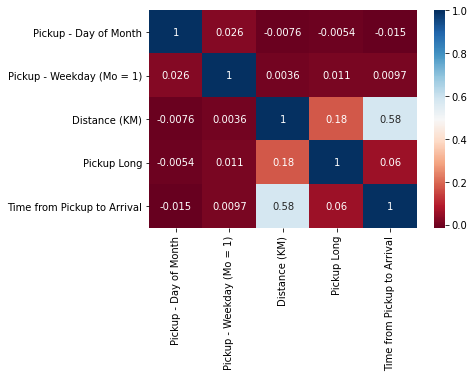

In [ ]:
print(y.shape)
print(new_test_df.shape)

columns = ['Pickup - Day of Month','Pickup - Weekday (Mo = 1)', 'Distance (KM)',  'Pickup Long', 'Time from Pickup to Arrival']
sns.heatmap(train_df[columns].corr(), annot=True, cmap="RdBu")

Standardise predictor variables and train the model and make predictions


In [ ]:
#columns of interest
columns_of_interest = ['Distance (KM)']
#X = copy_df[columns_of_interest]
#scaling the model
#ideal_columns = ['Distance (KM)', 'Pickup - Day of Month']
X = copy_df[columns_of_interest]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


#X_standardise = pd.DataFrame(X_scaled, columns=copy_df.columns)


#X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.333380, random_state=6) 


#invert tranform on predictions

#linear regression model object
lm = LinearRegression()

#training the model
#lm.fit(X_train, y_train)

#testing model

test_model_object = new_test_df[columns_of_interest]
test_model = scaler.fit_transform(test_model_object)

#SVM MODEL
sv_reg = SVR(kernel='rbf', gamma='auto')
sv_reg.fit(X_scaled, y)

gen_y_sv = sv_reg.predict(test_model)

#rmse
print('SV - RMSE: ', np.sqrt(metrics.mean_squared_error(y, gen_y_sv)))

RM = RandomForestRegressor(n_estimators=200, max_depth=17, random_state=6)

RM.fit(X_scaled, y)
gen_y_rf = RM.predict(test_model)

#rmse
print('RF - RMSE: ', np.sqrt(metrics.mean_squared_error(y, gen_y_rf)))

gen_y_rf = np.round(gen_y_rf, 0)
my_list = [i for i in gen_y_rf]


SV - RMSE:  1024.4947081885487
RF - RMSE:  1176.3908856196635


In [ ]:
#submit.head()

my_list = [int(i) for i in my_list]

submit = pd.DataFrame()
submit['Order_No'] = [i for i in test_df['Order No']]
submit['Time from Pickup to Arrival'] = [i for i in my_list]
submit.to_csv('Submissions.csv', index=False)
submit.head()



,Order_No,Time from Pickup to Arrival
0,Order_No_19248,1704
1,Order_No_12736,1526
2,Order_No_768,1795
3,Order_No_15332,1571
4,Order_No_21373,1092
